<a href="https://colab.research.google.com/github/mayank444/Fashion-mnist/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

# Load Data

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print('shape of X_train:',X_train.shape)
print('shape of y_train:',y_train.shape)
print('shape of X_test:',X_test.shape)
print('shape of y_test:',y_test.shape)

shape of X_train: (60000, 28, 28)
shape of y_train: (60000,)
shape of X_test: (10000, 28, 28)
shape of y_test: (10000,)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

In [6]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Show Images

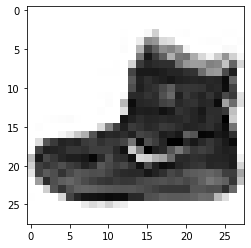

In [7]:
plt.imshow(X_train[0],cmap='Greys')

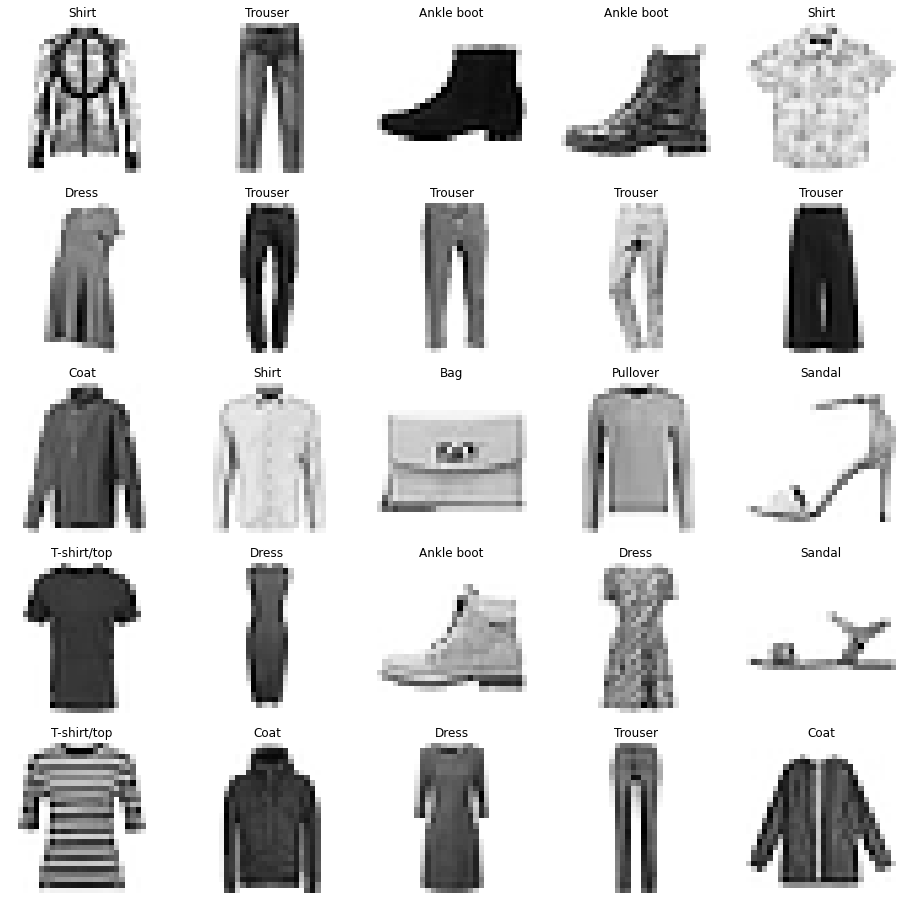

In [8]:
plt.figure(figsize=(16,16))

j = 1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j=j+1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title((class_labels[y_train[i]]))

# Change Dimensions

In [9]:
X_train.ndim

3

In [10]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [11]:
X_train.ndim

4

# Feature Scaling

In [12]:
X_train = X_train/255
X_test = X_test/255

# Split Dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [14]:
print('shape of X_train:',X_train.shape)
print('shape of X_val:',X_val.shape)
print('shape of y_train:',y_train.shape)
print('shape of y_val:',y_val.shape)

shape of X_train: (48000, 28, 28, 1)
shape of X_val: (12000, 28, 28, 1)
shape of y_train: (48000,)
shape of y_val: (12000,)


# CNN Network

In [15]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D((2,2)),
                                 keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu'),
                                 keras.layers.MaxPooling2D((2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128,activation='relu'),
                                 keras.layers.Dropout(0.25),
                                 keras.layers.Dense(units=256,activation='relu'),
                                 keras.layers.Dropout(0.25),
                                 keras.layers.Dense(units=128,activation='relu'),
                                 keras.layers.Dense(units=10,activation='softmax')

])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,epochs=15,batch_size=512,validation_data=(X_val,y_val))

Epoch 1/15
94/94 [==============================] - 34s 356ms/step - loss: 1.3412 - accuracy: 0.5163 - val_loss: 0.5146 - val_accuracy: 0.7978
Epoch 2/15
94/94 [==============================] - 34s 358ms/step - loss: 0.5330 - accuracy: 0.8000 - val_loss: 0.4073 - val_accuracy: 0.8512
Epoch 3/15
94/94 [==============================] - 40s 424ms/step - loss: 0.4225 - accuracy: 0.8456 - val_loss: 0.3597 - val_accuracy: 0.8686
Epoch 4/15
94/94 [==============================] - 33s 356ms/step - loss: 0.3742 - accuracy: 0.8658 - val_loss: 0.3555 - val_accuracy: 0.8694
Epoch 5/15
94/94 [==============================] - 33s 356ms/step - loss: 0.3405 - accuracy: 0.8761 - val_loss: 0.3087 - val_accuracy: 0.8852
Epoch 6/15
94/94 [==============================] - 33s 354ms/step - loss: 0.3115 - accuracy: 0.8856 - val_loss: 0.2936 - val_accuracy: 0.8911
Epoch 7/15
94/94 [==============================] - 34s 357ms/step - loss: 0.2996 - accuracy: 0.8906 - val_loss: 0.2930 - val_accuracy: 0.8940

# Test and Evaluate Model

In [18]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

9

In [20]:
y_test[0]#predicted and real values are same

9

In [21]:
y_pred = model.predict(X_test).round(2)

In [22]:
y_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.12, 0.15, 0.02]], dtype=float32)

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2706 - accuracy: 0.9023


[0.2705641984939575, 0.9023000001907349]

# Visualize Output

In [24]:
history_dict = history.history

In [25]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

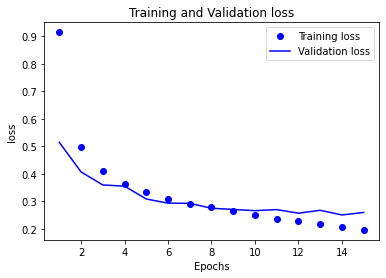

In [26]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

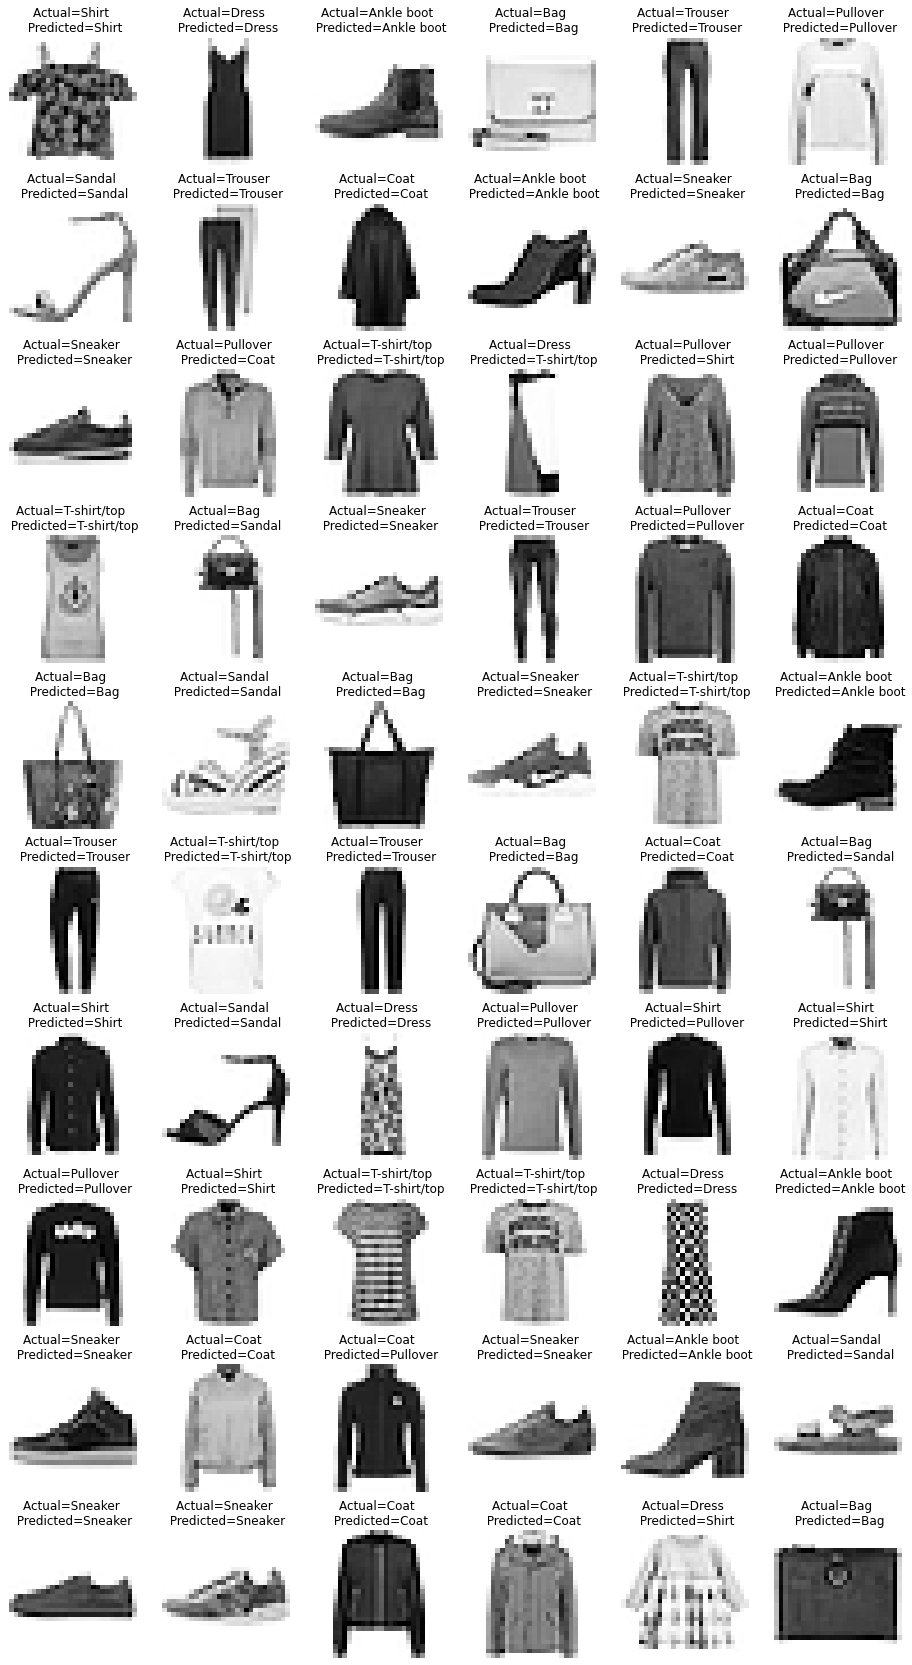

In [27]:
plt.figure(figsize=(16,30))
j = 1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.axis('off')
  plt.title('Actual={} \n Predicted={}'.format(class_labels[y_test[i]],class_labels[np.argmax(y_pred[i])]))

# Confusion Matrix

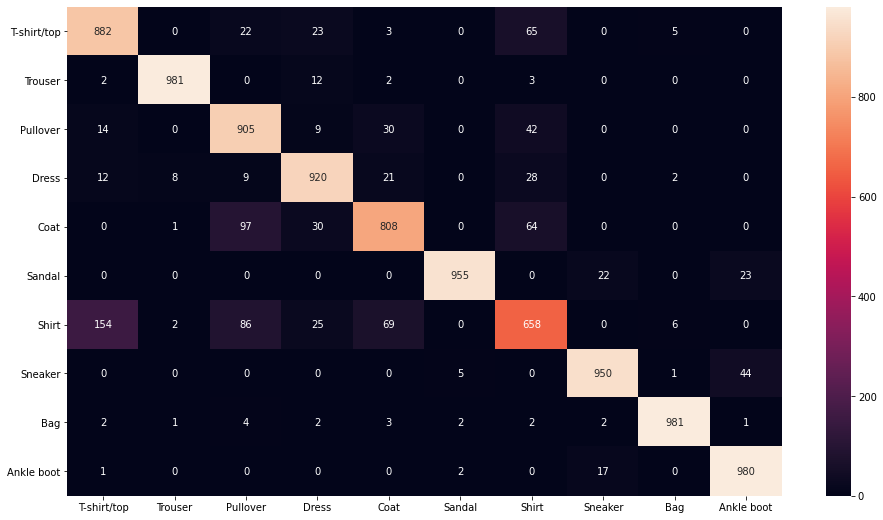

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)


In [29]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.88      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.91      0.85      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.86      0.81      0.83      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.76      0.66      0.71      1000
     Sneaker       0.96      0.95      0.95      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

